<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_simulacionExamen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import re
import matplotlib.pyplot as plt
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/DataScience2022-2/main/literacy_rates.csv')
#df.to_csv('df'+'.csv', index = False)

#importacion de librerias esenciales: pandas,numpy,re,matplotlib
#carga del archivo.csv que reside en github con la sentencia read_csv
#para los siguientes puntos no se logra identificar inconsisitencias o anomalias como las mencionadas
#Identifiquen y aborden cualquier inconsistencias en los valores categóricos (ejemplo: cat, Cat, cats).
#Identifiquen y aborden cualquier punto de datos inapropiados o inusuales (ejemplo: la edad no puede ser 325)

In [93]:
######################## apartado datos duplicados ##############################
lista_a=df.columns
for i in (lista_a):
  lista=len(df[i].unique())
  valor=len(df[i])
  print(f"el atributo {i}, contiene {lista} valores unicos, de un total de {valor} registros. y los no vacios o duplicados son {valor - lista}")
  print('---------------------------')

#Este codigo identifica los nombres de las columnas del df y las conserva en una lista (lista_a=df.columns)
#luego en un ciclo recorre cada una de estas columnas, contando los valores unicos de estas (lista=len(df[i].unique()))
#tambien en la variable valor guarda el conteo total de registros de esa columna (valor=len(df[i]))
#por ultimo imprime por pantalla los valores recien obtenidos, mientres dure el ciclo for (for i in (lista_a))

el atributo Region, contiene 8 valores unicos, de un total de 4955 registros. y los no vacios o duplicados son 4947
---------------------------
el atributo Country, contiene 155 valores unicos, de un total de 4955 registros. y los no vacios o duplicados son 4800
---------------------------
el atributo Year, contiene 9 valores unicos, de un total de 4955 registros. y los no vacios o duplicados son 4946
---------------------------
el atributo Age, contiene 4 valores unicos, de un total de 4955 registros. y los no vacios o duplicados son 4951
---------------------------
el atributo Gender, contiene 3 valores unicos, de un total de 4955 registros. y los no vacios o duplicados son 4952
---------------------------
el atributo Literacy rate, contiene 4835 valores unicos, de un total de 4955 registros. y los no vacios o duplicados son 120
---------------------------


In [94]:
######################## apartado datos faltantes ##############################
cont_falt = round(df.isnull().sum(), 0)
porc_falt = round(df.isnull().sum() * 100 / len(df), 3)
print('total datos faltantes\n',cont_falt)
print('---------------------------')
print('porc datos faltantes\n',porc_falt)
#Este codigo suma los registros nulos del df,luego redondea esta suma a un valor con 0 decimales y lo guarda en la var cont_falt (cont_falt = round(df.isnull().sum(), 0))
#luego repite la operacion anterior pero esta vez multiplica esta suma por 100 para dividir por el total de registros de la columna
#y por ultimo redondea el valor resultante a 3 decimales y lo guarda en la var porc_falt (porc_falt = round(df.isnull().sum() * 100 / len(df), 3))
#para finalizar imprime por pantalla los valores recien obtenidos

total datos faltantes
 Region           5
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64
---------------------------
porc datos faltantes
 Region           0.101
Country          0.000
Year             0.000
Age              0.000
Gender           0.000
Literacy rate    0.000
dtype: float64


In [95]:
######################## tratamiento datos faltantes ##############################
df.fillna("s_i", inplace = True)
cont_falt = round(df.isnull().sum(), 0)
porc_falt = round(df.isnull().sum() * 100 / len(df), 3)
print('total datos faltantes\n',cont_falt)
print('---------------------------')
print('porc datos faltantes\n',porc_falt)
#utiliza el mismo codigo anterior y agrega de forma previa el reemplazo de valores nan a 's_i' -> sin informacion
#df.fillna("s_i", inplace = True)

total datos faltantes
 Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64
---------------------------
porc datos faltantes
 Region           0.0
Country          0.0
Year             0.0
Age              0.0
Gender           0.0
Literacy rate    0.0
dtype: float64


In [96]:
######################## conversion de datos col segun diccionario de datos ##############################
df['Literacy rate']=df['Literacy rate'].apply(lambda x:(re.sub('[^0-9.]', '', x))).astype(float)/100
df.info()
#segun la descripcion del diccionario de datos, solo la columna 'Literacy rate' no concuerda con el formato esperado
#esto por que un registro contiene un caracter "no compatible" con el tipo float.
#la linea anterior de codigo utiliza re (reemplazar) para eliminar todo aquel caracter que sea diferente al rango 0-9
#y tambien diferente a punto(.), con este reemplazo realizado, se convierte el valor a float (astype(float)) y luego lo divide en 100 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         4955 non-null   object 
 1   Country        4955 non-null   object 
 2   Year           4955 non-null   int64  
 3   Age            4955 non-null   object 
 4   Gender         4955 non-null   object 
 5   Literacy rate  4955 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 232.4+ KB


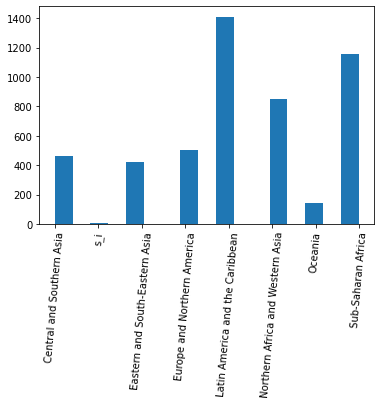

In [97]:
########################################### visualizacion exploratoria univariante 01###################################
plt.hist(df['Region'],bins=17)
plt.xticks(rotation=85)
plt.show()
#grafico histograma, utiliza la col 'Region' del df y se "modelan" las barras con la sentencia bins
#ademas se le indica que para el eje x, debe "inclinar" en 85 grados los valores del label (rotation)
#podemos observar que existen una mayor medicion en latin america and the caribbean


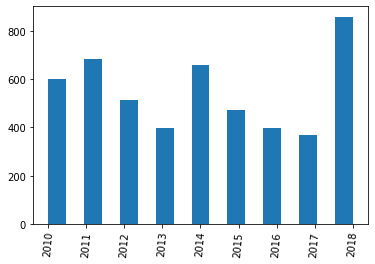

In [98]:
########################################### visualizacion exploratoria univariante 02###################################
plt.hist(df['Year'],bins=17)
plt.xticks(rotation=85)
plt.show()
#grafico histograma, utiliza la col 'Year' del df y se "modelan" las barras con la sentencia bins
#ademas se le indica que para el eje x, debe "inclinar" en 85 grados los valores del label (rotation)
#podemos observar que existen una mayor medicion durante el año 2018     

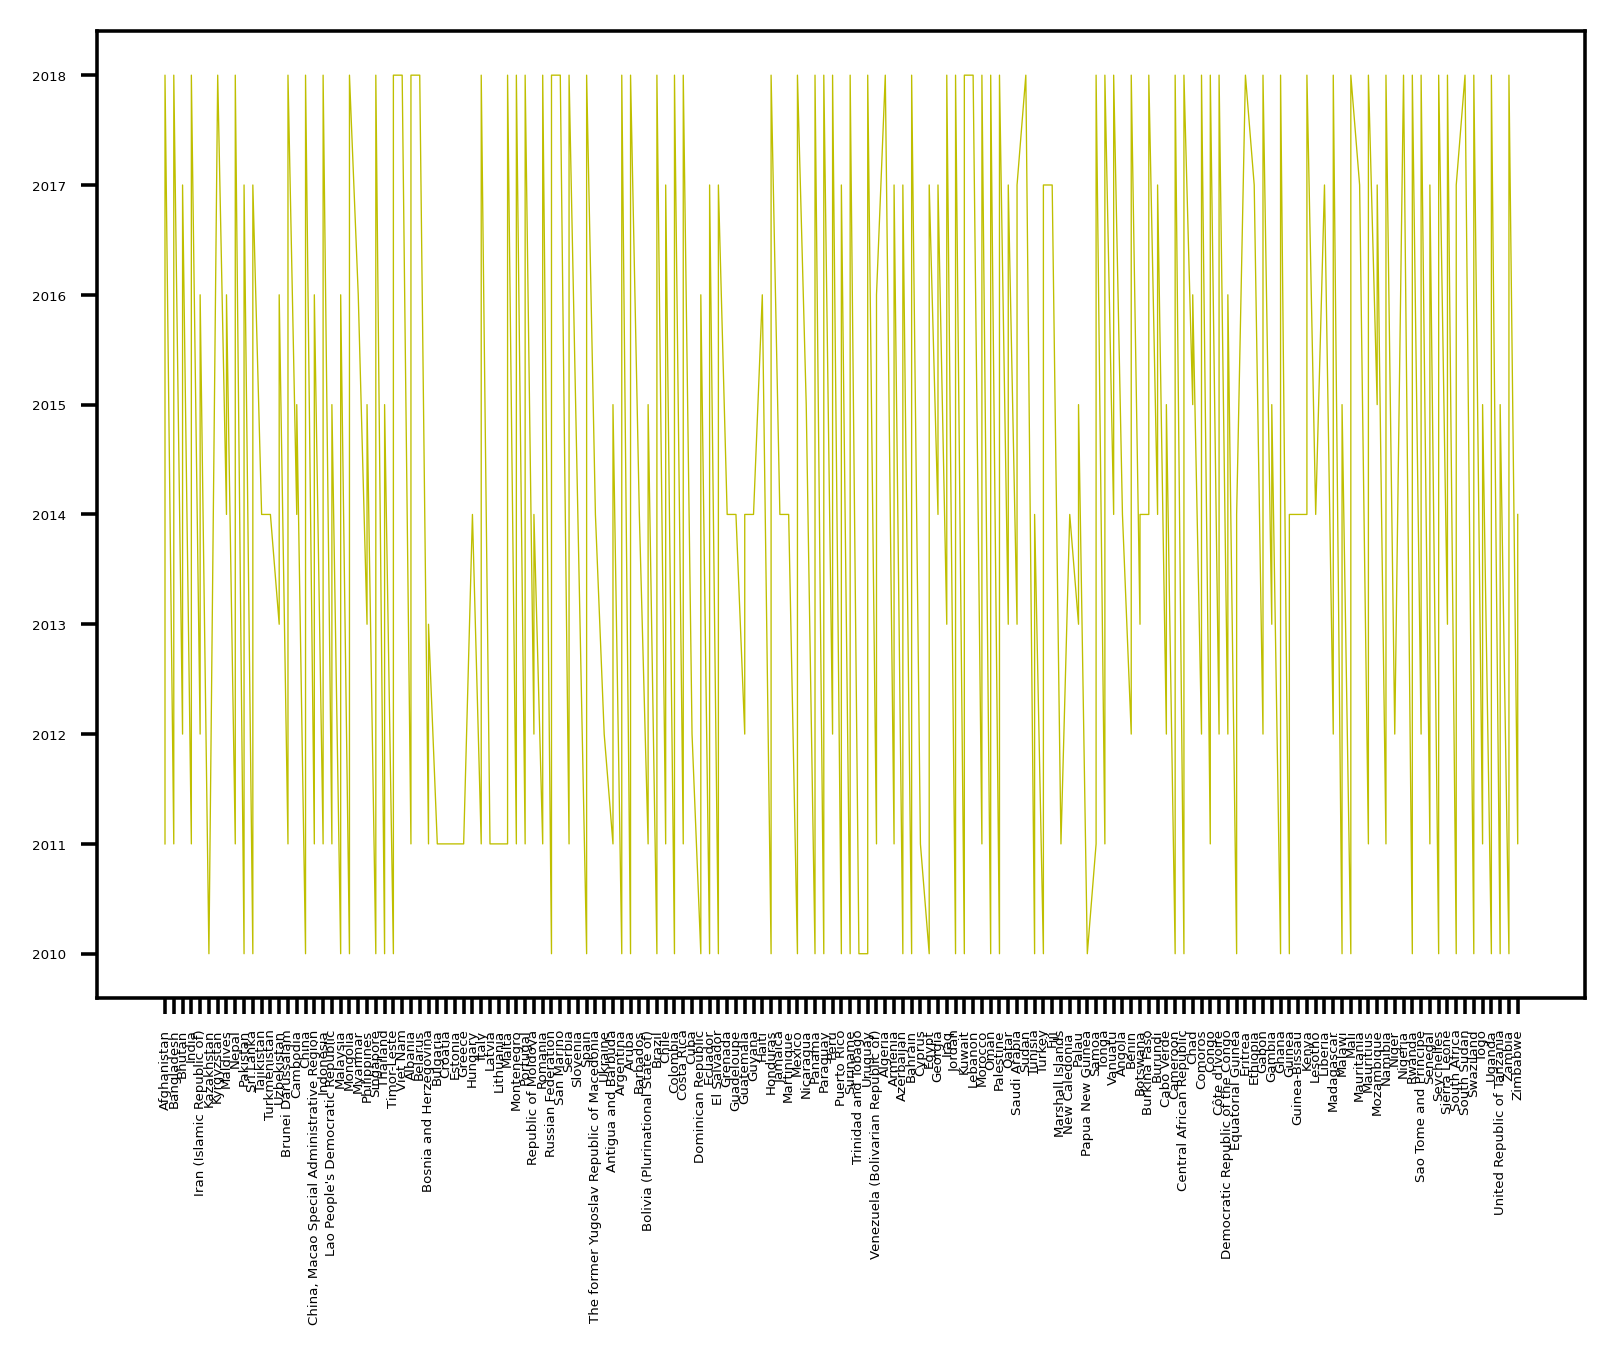

In [99]:
########################################### visualizacion exploratoria multivariante 01###################################
y1 = df['Year']
x1 = df['Country']
plt.figure(dpi=320)
plt.plot(x1, y1, linewidth=0.3,c='y')
plt.xticks(rotation=90,fontsize=3)
plt.yticks(fontsize=3)
plt.show()
#grafico lineal, utiliza las col 'Year' y 'Country'del df,se "modelan" las lineas con la sentencia linewidth y se "pintan"
#estas de color amarillo con la sentencia -> c='y', tambien se diseña el tamaño con la sentencia plt.figure(dpi=320)
#ademas se le indica que para el eje x, debe "inclinar" en 90 grados (rotation)
# y dar un tamaño de 3 a la fuente usada (fontsize) en los valores del label
#podemos observar que existen el peak de medicion de los distintos paises se produjo durante el año 2018  

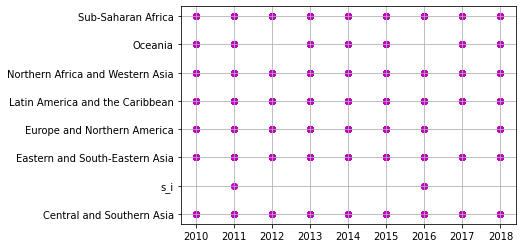

In [100]:
########################################### visualizacion exploratoria multivariante 02###################################
val1=df['Year']
val2=df['Region']
fig, ax=plt.subplots()
ax.scatter(val1,val2,c='m')
plt.grid()
plt.show()

#grafico dispersion, utiliza las col 'Year' y 'Region'del df,se "pintan"
#estas de color magenta con la sentencia -> c='m', tambien se diseña el fondo del grafo como una grilla con la sentencia plt.grid()
#podemos observar que del total de regiones solo 5 realizaron la medicion durante el periodo 2010-2018
#(Sub-Saharan Africa,Northern Africa and Western Asia,Latin America and the Caribbean,Eastern and South-Eastern Asia,Central and Southern Asia)